# **Fake News Project**
Fake news has become one of the biggest problems of our age. It has serious impact on our online as well as offline discourse. One can even go as far as saying that, to date, fake news poses a clear and present danger to western democracy and stability of the society.

1. What is a Fake News?

- Fake news's simple meaning is to incorporate information that leads people to the wrong path. Nowadays fake news spreading like water and people share this information without verifying it. This is often done to further or impose certain ideas and is often achieved with political agendas. For media outlets, the ability to attract viewers to their websites is necessary to generate online advertising revenue. So it is necessary to detect fake news.In this project, we are using some machine learning and Natural language processing libraries like NLTK, re (Regular Expression), Scikit Learn.

2. Natural Language Processing

- Machine learning data only works with numerical features so we have to convert text data into numerical columns. So we have to preprocess the text and that is called natural language processing. In-text preprocess we are cleaning our text by steaming, lemmatization, remove stopwords, remove special symbols and numbers, etc. After cleaning the data we have to feed this text data into a vectorizer which will convert this text data into numerical features.

3. About Dataset

- There are two datasets one for fake news and one for true news. In true news, there is 21417 news, and in fake news, there is 23481 news. We have to insert one label column zero for fake news and one for true news. We have to combine both datasets using pandas built-in function.


# Importing Library

In [1]:
# Loading Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import string
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Loading warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Display maximum columns and Rows 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)

# Loading Data Frame
df1=pd.read_csv(r'True.csv',encoding="ISO-8859-1")

In [3]:
# About True DataSets
print("True DATA FRAME\n","****"*10,'\n',"Shape :",df1.shape,"Total Rows :",df1.shape[0],"Total Columns :",df1.shape[1],'Size  :',df1.size,'Dimension :',df1.ndim)

True DATA FRAME
 **************************************** 
 Shape : (21417, 4) Total Rows : 21417 Total Columns : 4 Size  : 85668 Dimension : 2


**LOADING TRUE DATA SET**

In [4]:
# adding new column Named True as they are True news
df1['Class_Labels']="True"

In [5]:
# Top 2 of Data Frame
df1.head(2)

,title,text,subject,date,Class_Labels
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True


In [6]:
# last 2 of Data Frame
df1.tail(2)

,title,text,subject,date,Class_Labels
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",True
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",True


**LOADING FAKE DATA SET**

In [7]:
# Loading Fake news 
df2=pd.read_csv(r"Fake.csv",encoding="ISO-8859-1")

In [8]:
# Adding new columns as Class Labels named false as it contains false news
df2['Class_Labels']="Fake"

In [9]:
# columns
print("FAKE DATA FRAME\n","****"*10,'\n',"Shape :",df2.shape,"Total Rows :",df2.shape[0],"Total Columns :",df2.shape[1],'Size  :',df2.size,'Dimension :',df2.ndim)

FAKE DATA FRAME
 **************************************** 
 Shape : (23481, 5) Total Rows : 23481 Total Columns : 5 Size  : 117405 Dimension : 2


In [10]:
# Top 2 Rows
df2.head(2)

,title,text,subject,date,Class_Labels
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake


In [11]:
# Top 2 Rows
df2.tail(2)

,title,text,subject,date,Class_Labels
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",Fake


# **Merging Data Sets**

In [12]:
# Merging True and Fake News column wise
df= pd.concat([df1,df2], ignore_index=True)

In [14]:
print("Checking top 5 Rows")
df.head(5)

Checking top 5 Rows


,title,text,subject,date,Class_Labels
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


# **ABOUT DATA SET**

In [15]:
print("Info Data Frame")
print("******"*10)
print("Shape of Data Frame",df.shape,"\nSize of Data Frame",df.size,"\nDimension of Data Frame",df.ndim,)
print("\nData Frame Having a total Columns of {} and total Rows of {}".format(df.shape[0],df.shape[1]))

Info Data Frame
************************************************************
Shape of Data Frame (44898, 5) 
Size of Data Frame 224490 
Dimension of Data Frame 2

Data Frame Having a total Columns of 44898 and total Rows of 5


In [16]:
# printing columns

print("Total Columns\n",df.columns)

Total Columns
 Index(['title', 'text', 'subject', 'date', 'Class_Labels'], dtype='object')


In [17]:
# Data Set Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         44898 non-null  object
 1   text          44898 non-null  object
 2   subject       44898 non-null  object
 3   date          44898 non-null  object
 4   Class_Labels  44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


### Observations
- This Data Set contains 5 columns
- Size of the Data Set 1.8 MB

 **Finding N-Unique Values**

In [18]:
# unique
total_counts=pd.DataFrame(df.nunique(axis=0),columns=["Counts"])
total_counts

,Counts
title,38729
text,38646
subject,8
date,2397
Class_Labels,2


# **Duplicated Rows**

In [19]:
print("Their are {} duplicated values".format(df.duplicated().sum()))

Their are 209 duplicated values


In [20]:
print("Printing First Duplicated Rows",df[df.duplicated(keep="first")].shape[0])
print("Printing Last Duplicated Rows",df[df.duplicated(keep="last")].shape[0])

Printing First Duplicated Rows 209
Printing Last Duplicated Rows 209


In [21]:
# dropping
print("Droping Duplicated Rows",df.drop_duplicates(inplace=True))

# after dropping
print("Droping Total Duplicated Rows",df.duplicated().sum())

Droping Duplicated Rows None
Droping Total Duplicated Rows 0


# **Checking Null Values and Missing Percentage**

In [22]:
#creating data frame of missing values and missing percentage
Missing=pd.DataFrame(data={"Missing Value":df.isnull().sum(),"Missing Percentage":(df.isnull().sum()/df.shape[0])*100})
Missing

,Missing Value,Missing Percentage
title,0,0.0
text,0,0.0
subject,0,0.0
date,0,0.0
Class_Labels,0,0.0


**Observation**
- Shows No Missing Values

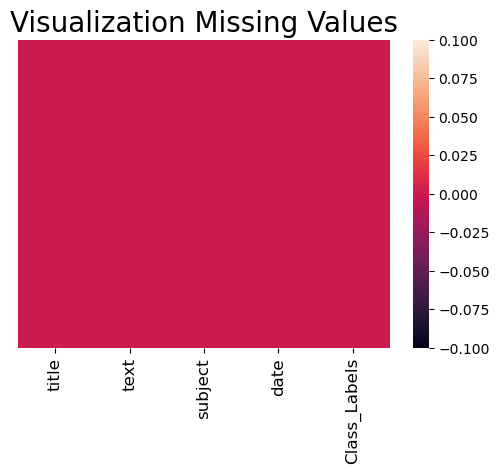

In [23]:
# Null Value Visualization
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(),yticklabels=False)
plt.title("Visualization Missing Values",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0)
plt.show()

In [24]:
# droping columns that don't add much to model
df.drop('title',axis=1,inplace=True)

In [25]:
# checking if rows containts zeros
df[df==0].sum().sum()

0

In [26]:
print("Checking if any row shows empty")
df[df['text']==' '].shape[0]

Checking if any row shows empty


627

# **Data Pre-Processing**

In [27]:
# drawing year in year column
df['year']=[str(i).split()[-1] for i in df['date']]

# drawing month in month column
df['month']=[str(i).split()[0] for i in df['date']]

In [28]:
# drawing month and day from date
df['day']=[str(i).split(',')[0] for i in df['date']]

# drawing day from day column
df['day']=[str(i).split()[-1] for i in df['day']]


In [29]:
column=['day', 'month', 'year']
for i in column:
    print("COLUMN:",i,"\n",df[i].unique())
    print("\n")

COLUMN: day 
 ['31' '29' '30' '28' '25' '27' '26' '24' '23' '22' '21' '19' '20' '18'
 '15' '16' '17' '14' '13' '12' '11' '10' '8' '9' '7' '6' '5' '4' '3' '1'
 '2' '19-Feb-18' '18-Feb-18' '17-Feb-18' '16-Feb-18' '15-Feb-18'
 '14-Feb-18'
 'https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/'
 'https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/'
 'https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/'
 'https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg'
 'https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg'
 '[Video]']


COLUMN: month 
 ['December' 'November' 'October' 'September' 'August' 'July' 'June' 'May'
 'April' 'March' 'February' 'January' '19-Feb-18' '18-Feb-18' '17-Feb-18'
 '16-Feb-18' '15-Feb-18' '14-Feb-18' 'Dec' '

In [30]:
df.head(2)

,text,subject,date,Class_Labels,year,month,day
0,WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True,2017,December,31
1,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True,2017,December,29


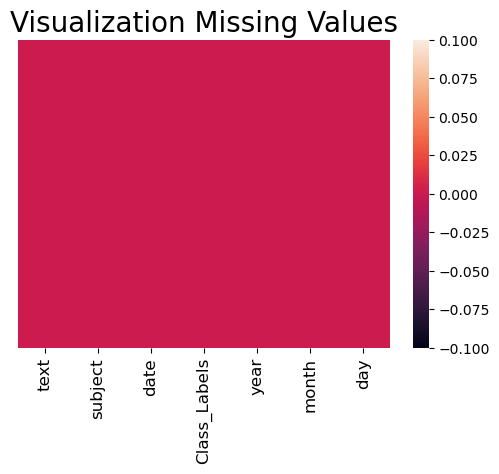

In [32]:
# Null Value Visualization
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(),yticklabels=False)
plt.title("Visualization Missing Values",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0)
plt.show()

# **Exploratory Data Analysis**

**Univariate Analysis**

politicsNews    11220
worldnews        9991
News             9050
politics         6838
left-news        4459
Name: subject, dtype: int64


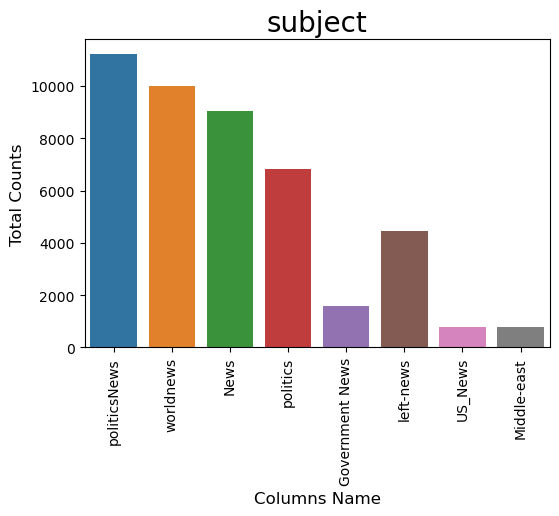

Fake    23478
True    21211
Name: Class_Labels, dtype: int64


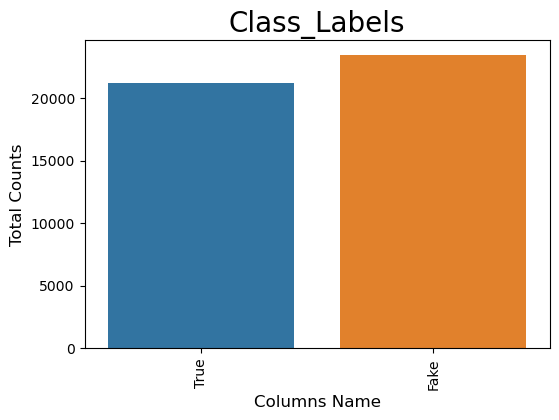

In [33]:
column=['subject', 'Class_Labels']
for i in column:
    plt.figure(figsize=(6,4))
    print(df[i].value_counts()[:5])
    sns.countplot(x=i,data=df,)
    plt.title(i,fontsize=20)
    plt.xlabel("Columns Name",fontsize=12)
    plt.xticks(rotation=90)
    plt.ylabel("Total Counts",fontsize=12)
    plt.show()

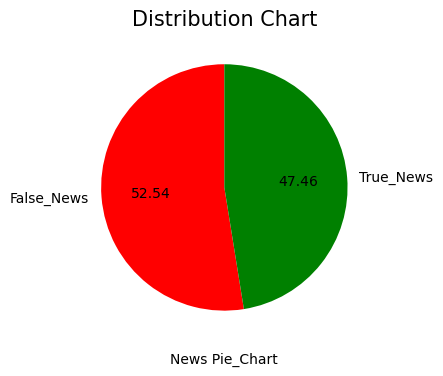

In [34]:
plt.figure(figsize=(6,4))
plt.pie(df['Class_Labels'].value_counts(),labels=['False_News','True_News'],autopct="%0.02f",colors=['red','green'], startangle=90)
plt.title("Distribution Chart",fontsize=15)
plt.xlabel("News Pie_Chart",fontsize=10)
plt.show()

**OBSERVATIONS**

1. PoliticsNews having 11220 maximum news and Middle-East having maximum Fake.
2. Counts of Fake News are high.

## Replace Values

**Total Characters**

In [35]:
df['Total_characters']=df['text'].apply(len)

**Total Words**

In [36]:
df['Total_words']=df['text'].apply(lambda word:len(nltk.word_tokenize(word)))

**Total Sentence**

In [37]:
df['Total_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

Minimum Character : 1 
Maximum Characters : 51794


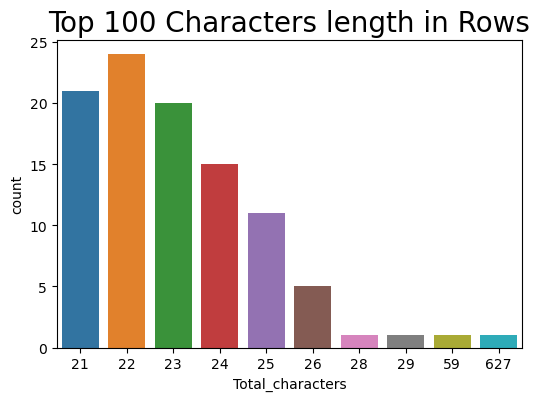

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["Total_characters"].value_counts()[:100],data=df)
plt.title("Top 100 Characters length in Rows",fontsize=20)
print("Minimum Character :",df['Total_characters'].min(),"\nMaximum Characters :",df['Total_characters'].max())

Minimum Sentences : 0 
Maximum Sentences : 313


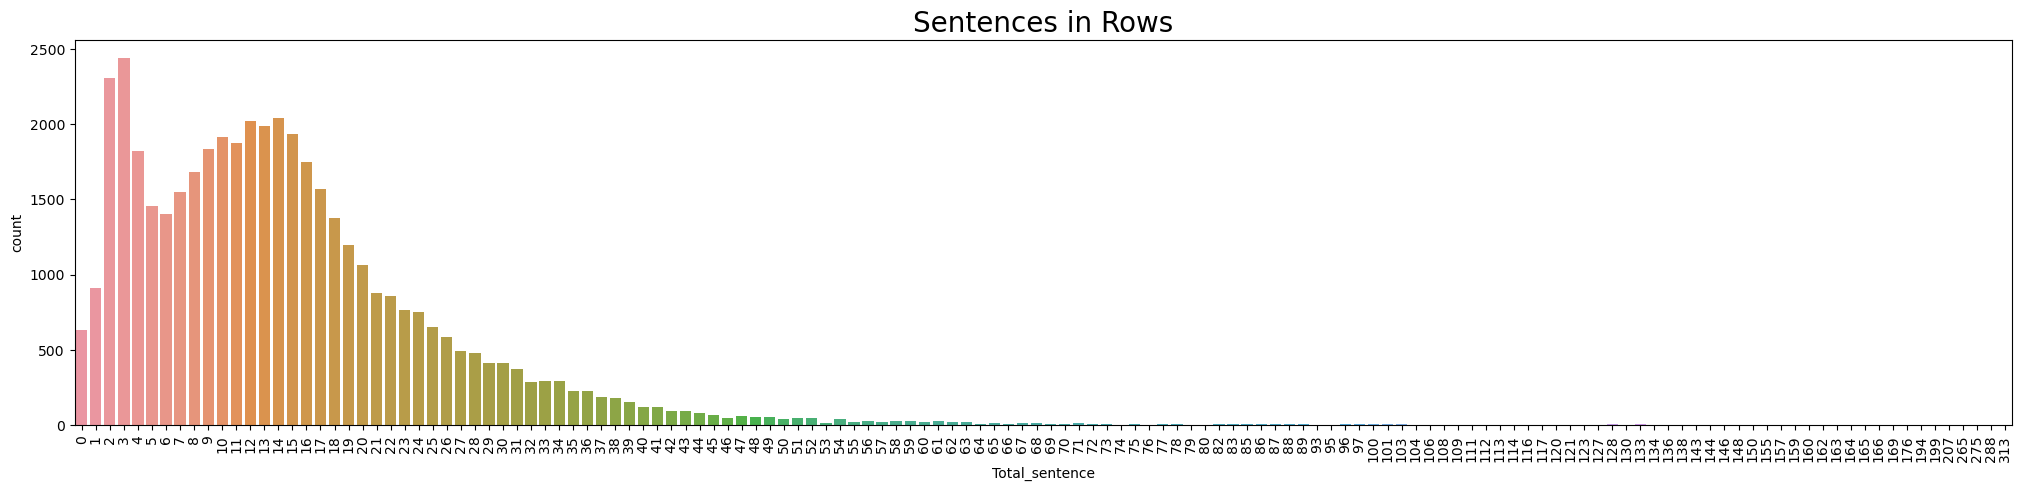

In [39]:
plt.figure(figsize=(25,5))
sns.countplot(x=df['Total_sentence'],data=df)
plt.title("Sentences in Rows",fontsize=20)
print("Minimum Sentences :",df['Total_sentence'].min(),"\nMaximum Sentences :",df['Total_sentence'].max())
plt.xticks(rotation=90)
plt.show()

# **Bivariate Analysis** 

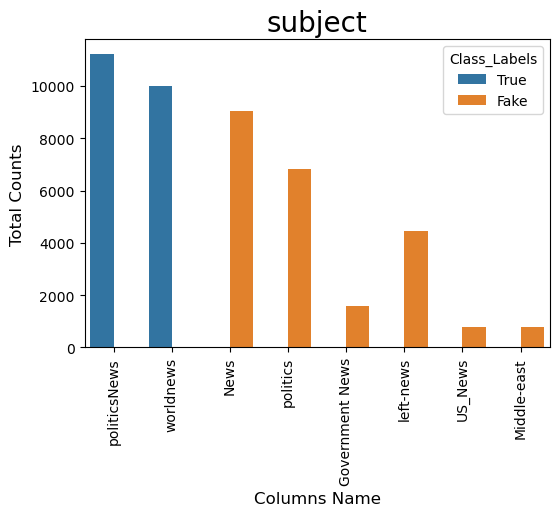

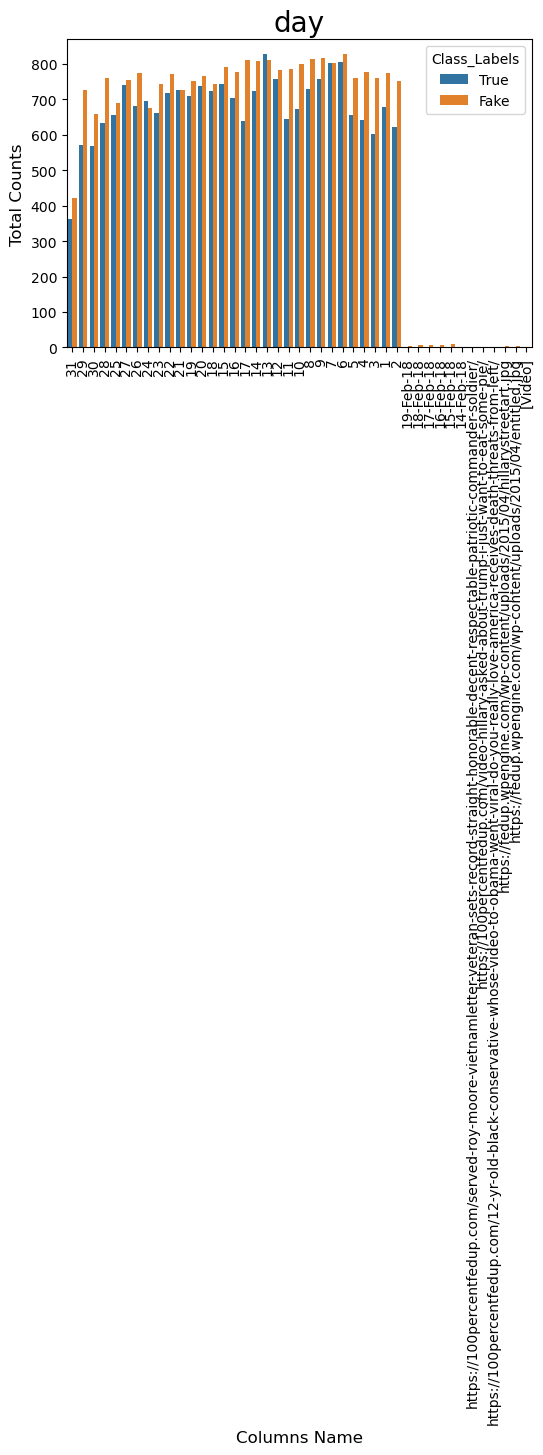

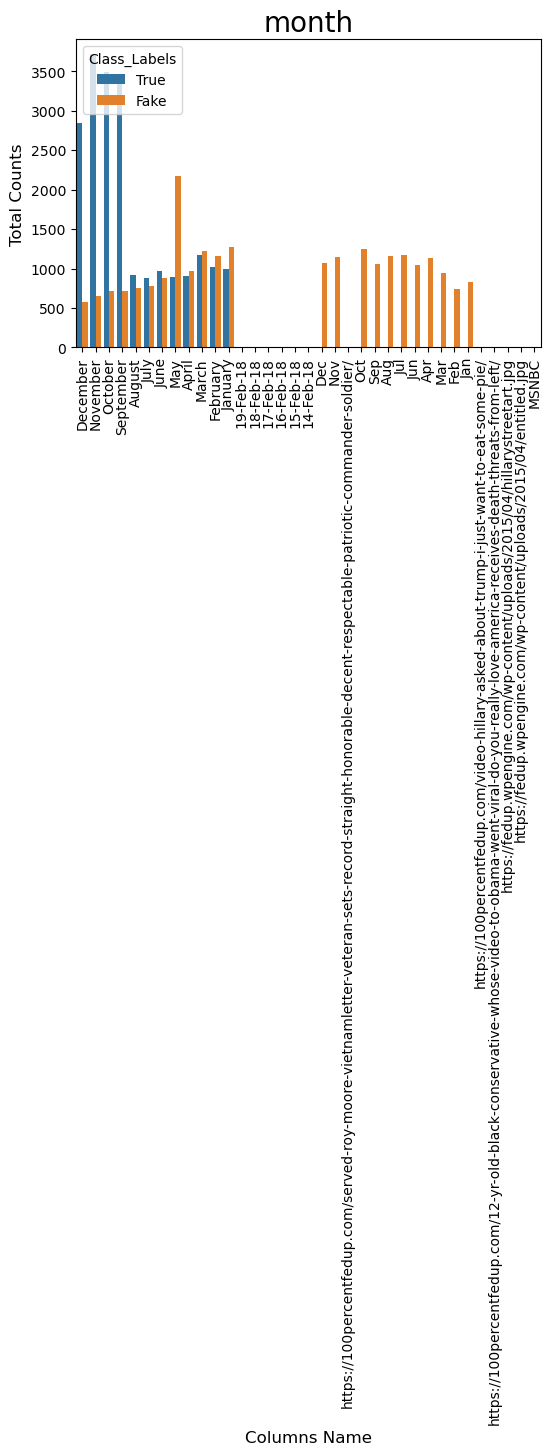

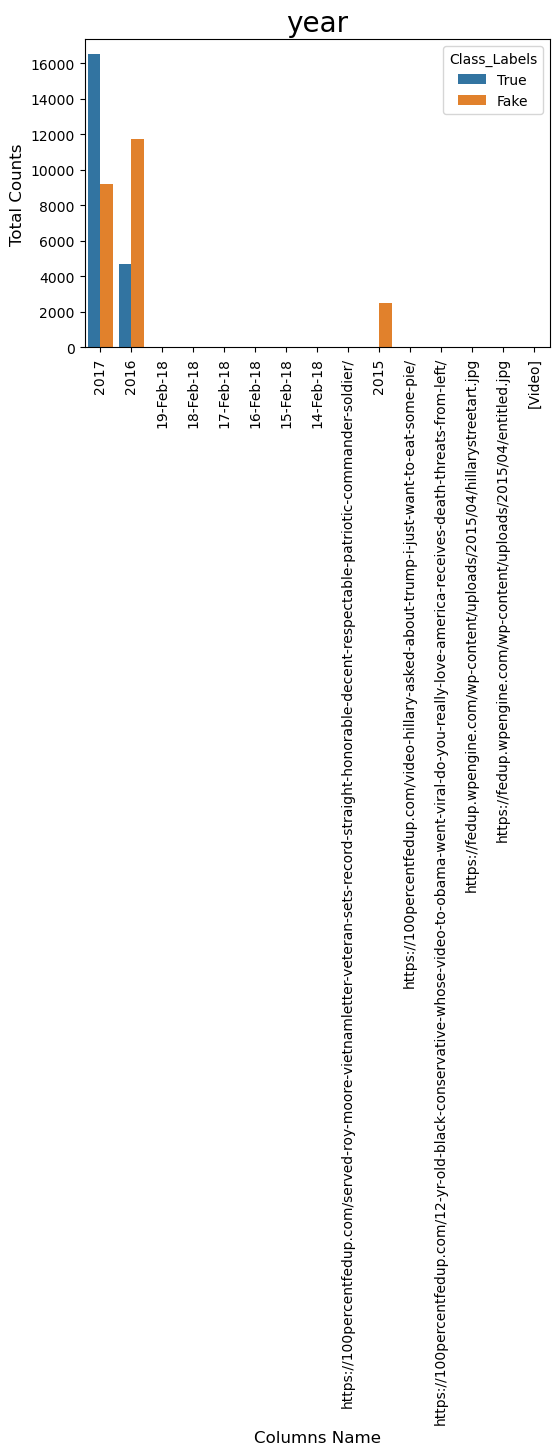

In [40]:
column=['subject','day', 'month', 'year']

for i in column:
    plt.figure(figsize=(6,4))
    sns.countplot(x=i,data=df,hue=df['Class_Labels'])
    plt.title(i,fontsize=20)
    plt.xlabel("Columns Name",fontsize=12)
    plt.xticks(rotation=90)
    plt.ylabel("Total Counts",fontsize=12)
    plt.show()

**Observations**

- Subject column Shows maximum news are fake.
- As the month ends the fake news increases.
- August,July,June,May,April,March,February,January has maximum false news
- September,October,November,December the Having True News
- Maximum false News in May
- False news counts are less in 2017 on compare with 2015 and 2016

**Unique Values**

In [41]:
print("Class_Labels :",df['Class_Labels'].unique())

Class_Labels : ['True' 'Fake']


In [42]:
# replace class labels
df['Class_Labels']=df['Class_Labels'].replace(['True','Fake'],[0,1])

**HAM VS SPAM**

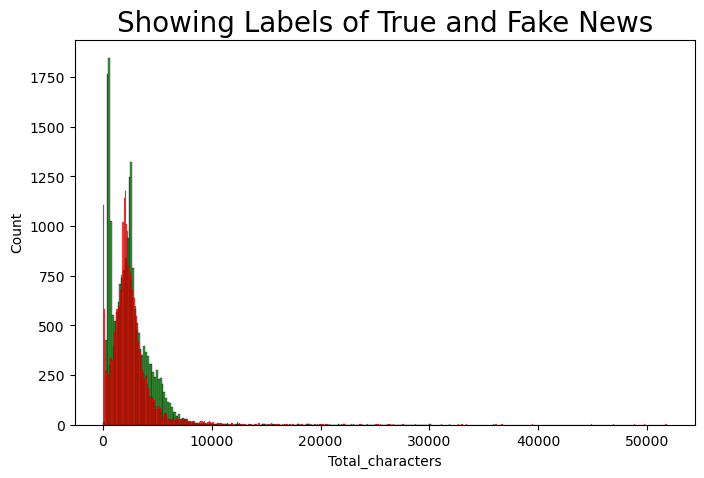

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['Class_Labels']==0]['Total_characters'],color='green')
sns.histplot(df[df['Class_Labels']==1]['Total_characters'],color='red')
plt.title("Showing Labels of True and Fake News",fontsize=20)
plt.show()

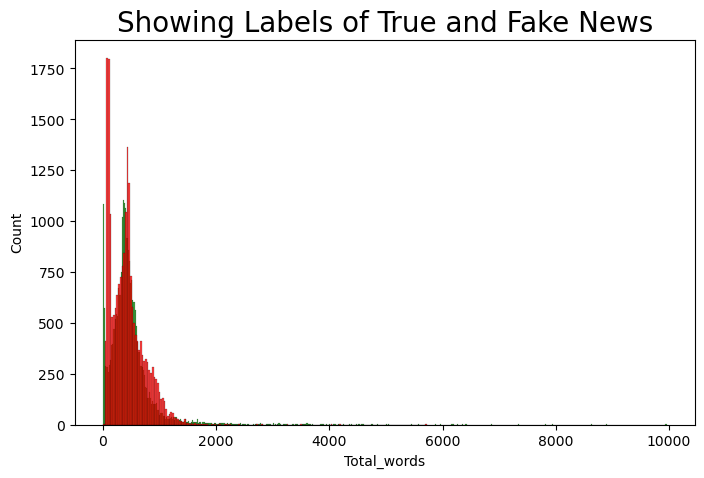

In [44]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['Class_Labels']==1]['Total_words'],color='green')
sns.histplot(df[df['Class_Labels']==0]['Total_words'],color='red')
plt.title('Showing Labels of True and Fake News',fontsize=20)
plt.show()

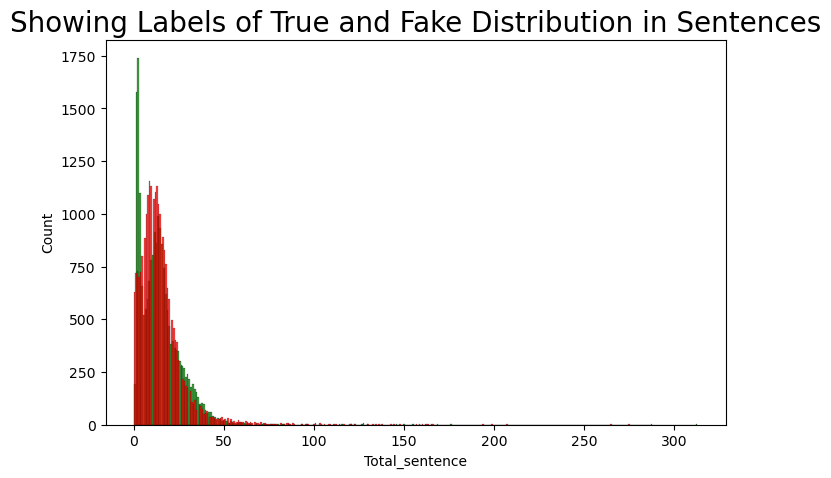

In [45]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['Class_Labels']==0]['Total_sentence'],color='green')
sns.histplot(df[df['Class_Labels']==1]['Total_sentence'],color='red')
plt.title("Showing Labels of True and Fake Distribution in Sentences",fontsize=20)
plt.show()

# **Multi-variate Graph**

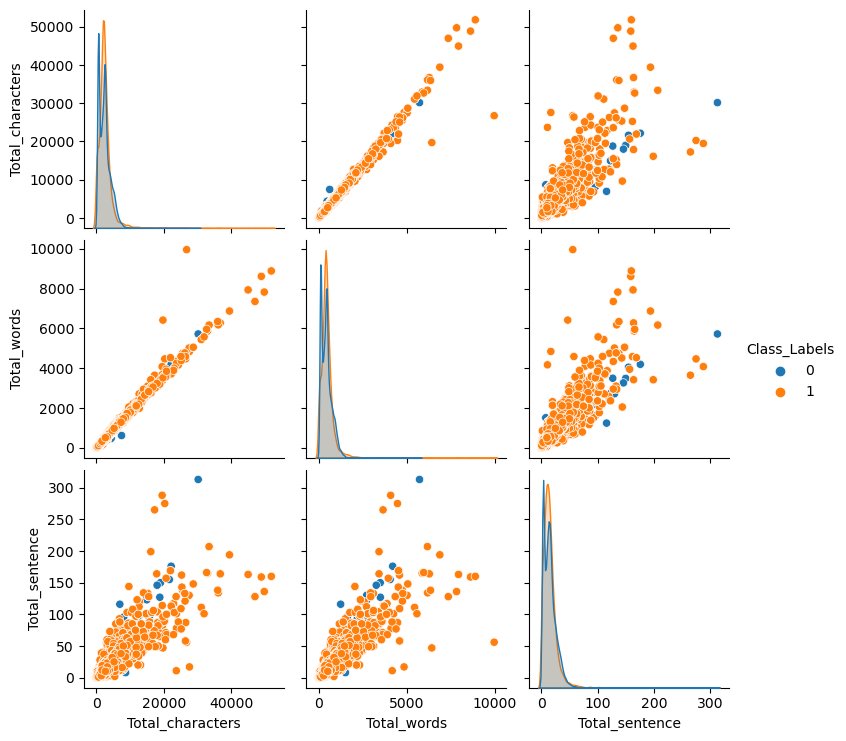

In [46]:
sns.pairplot(data=df,hue='Class_Labels')

# **Discriptive Graph**

In [47]:
df.describe()

,Class_Labels,Total_characters,Total_words,Total_sentence
count,44689.000000,44689.000000,44689.000000,44689.000000
mean,0.525364,2475.279733,448.227685,14.795274
std,0.499362,2178.917966,392.023208,12.604905
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1234.000000,224.000000,7.000000
50%,1.000000,2189.000000,400.000000,13.000000
75%,1.000000,3109.000000,567.000000,19.000000
max,1.000000,51794.000000,9958.000000,313.000000


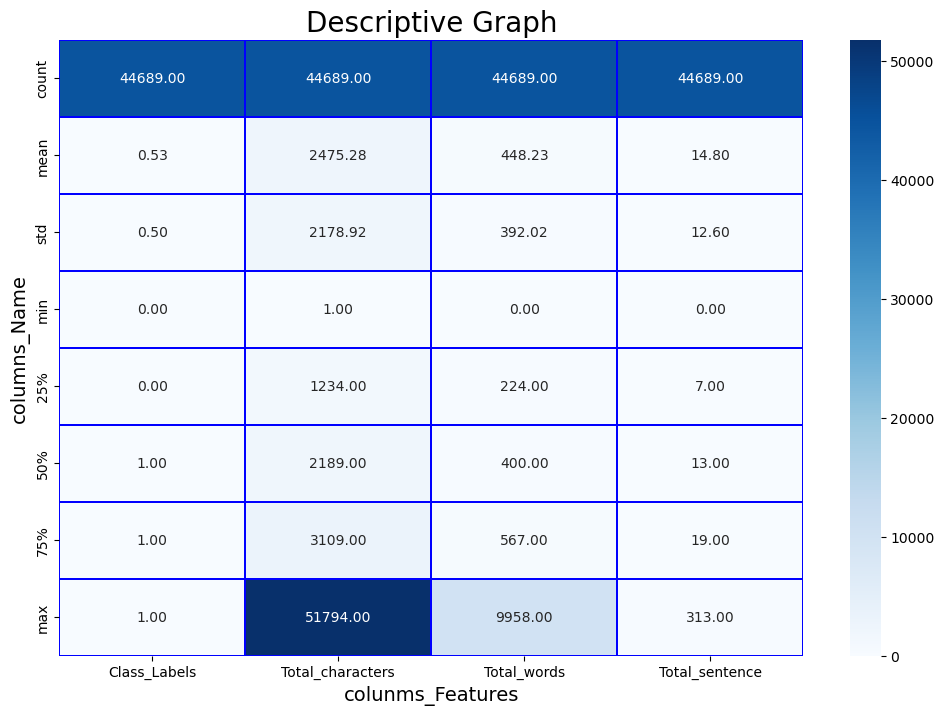

In [48]:
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),annot=True,linewidths=0.2,linecolor='blue',cmap='Blues',fmt='0.2f')
plt.title("Descriptive Graph",fontsize=20)
plt.xlabel('colunms_Features',fontsize=14)
plt.ylabel('columns_Name',fontsize=14)
plt.show()

In [49]:
df.corr()['Class_Labels'].sort_values()

Total_sentence      0.005182
Total_characters    0.034899
Total_words         0.058592
Class_Labels        1.000000
Name: Class_Labels, dtype: float64

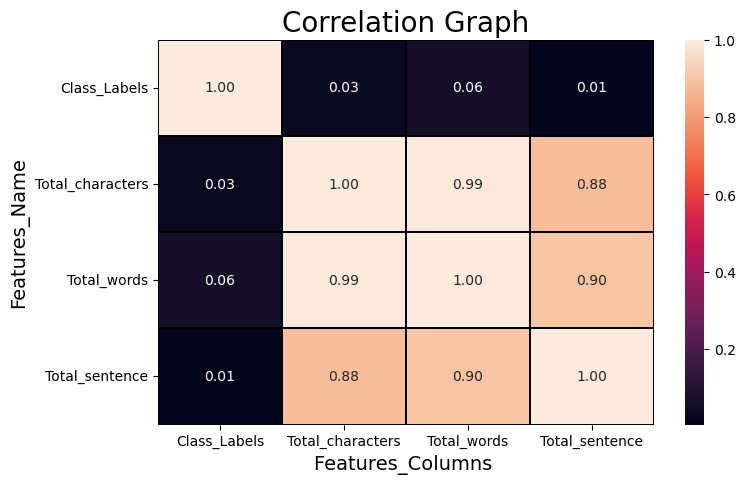

In [50]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr().T,annot=True,fmt='0.02f',linewidths=0.20,linecolor='black')
plt.title("Correlation Graph",fontsize=20)
plt.xlabel("Features_Columns ",fontsize=14)
plt.ylabel("Features_Name",fontsize=14)
plt.show()

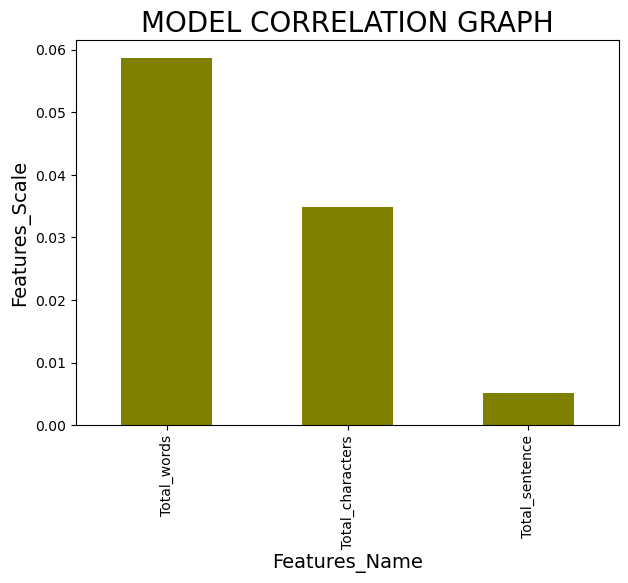

In [51]:
plt.figure(figsize=(7,5))
df.corr()['Class_Labels'].sort_values(ascending=False).drop("Class_Labels").plot(kind='bar',color='olive')
plt.title("MODEL CORRELATION GRAPH",fontsize=20)
plt.xlabel("Features_Name",fontsize=14,rotation=0)
plt.ylabel("Features_Scale",fontsize=14)
plt.show()

## **Observation**
- Total_characters have zero correlated with Target Variable
- Total_Words have have one correlation with the Target Variable
- Total_sentences have zero correlation with the Target Variable

## Dropping unwanted Columns*

In [52]:
df.columns

Index(['text', 'subject', 'date', 'Class_Labels', 'year', 'month', 'day',
       'Total_characters', 'Total_words', 'Total_sentence'],
      dtype='object')

In [53]:
df.drop( ['subject', 'date', 'year', 'month', 'day','Total_characters', 'Total_words', 'Total_sentence'],axis=1,inplace=True)

In [54]:
df.columns

Index(['text', 'Class_Labels'], dtype='object')

# **Data Pre-Processing** 

- Lower case
- Tokenization
- Removing Stop Words and Punctuation
- POS
- Steamming or Lemmatization

In [55]:
def transform(text):
    text=text.lower() # make in lower case
    text=nltk.word_tokenize(text) # tokenized each word
    corpus=[] 
    for i in text:
        if i.isalnum():# if text is alpha-numerical
            corpus.append(i) # append text
        
    new_corpus=corpus.copy() # making a copy
    corpus.clear() # clearing corpus
    
    for i in new_corpus: # from new corpus
        if i not in stopwords.words("english") and i not in string.punctuation: # using stop words of english language and all punctuations
            corpus.append(i) # appending 

    new_corpus=corpus.copy() # making a copy
    corpus.clear() #clearing the copy
    
    ps=PorterStemmer() #importing Porter Stemmer
    for i in new_corpus:
        corpus.append(ps.stem(i)) # used stemming process
    return " ".join(corpus)

## **Testing Function**

In [56]:
df['text'][10]

'(Reuters) - Alabama officials on Thursday certified Democrat Doug Jones the winner of the stateâ\x80\x99s U.S. Senate race, after a state judge denied a challenge by Republican Roy Moore, whose campaign was derailed by accusations of sexual misconduct with teenage girls. Jones won the vacant seat by about 22,000 votes, or 1.6 percentage points, election officials said. That made him the first Democrat in a quarter of a century to win a Senate seat in Alabama.  The seat was previously held by Republican Jeff Sessions, who was tapped by U.S. President Donald Trump as attorney general. A state canvassing board composed of Alabama Secretary of State John Merrill, Governor Kay Ivey and Attorney General Steve Marshall certified the election results. Seating Jones will narrow the Republican majority in the Senate to 51 of 100 seats. In a statement, Jones called his victory â\x80\x9ca new chapterâ\x80\x9d and pledged to work with both parties. Moore declined to concede defeat even after Trump

In [57]:
# using transformation
transform(df['text'][10])

'reuter alabama offici thursday certifi democrat doug jone winner senat race state judg deni challeng republican roy moor whose campaign derail accus sexual misconduct teenag girl jone vacant seat vote percentag point elect offici said made first democrat quarter centuri win senat seat alabama seat previous held republican jeff session tap presid donald trump attorney gener state canvass board compos alabama secretari state john merril governor kay ivey attorney gener steve marshal certifi elect result seat jone narrow republican major senat 51 100 seat statement jone call victori new pledg work parti moor declin conced defeat even trump urg stood claim fraudul elect statement releas certif said regret media outlet report alabama judg deni request block certif result 12 elect decis shortli canvass board met challeng alleg potenti voter fraud deni chanc victori file wednesday montgomeri circuit court sought halt meet schedul ratifi win thursday moor could ask recount addit possibl court

In [58]:
df['Transformed_Text']=df['text'].apply(transform)
df.sample(3)

,text,Class_Labels,Transformed_Text
24734,"Oh, Alabama. In some ways, you ve replaced Ari...",1,oh alabama way replac arizona texa florida cra...
44649,SARTRE 21st Century WireEvery day the world mo...,1,sartr 21st centuri wireeveri day world move cl...
20115,BAGHDAD (Reuters) - Iraq s parliament voted on...,0,baghdad reuter iraq parliament vote thursday r...


In [59]:
print("New Length for Row 1 is ",len(df['Transformed_Text'][0]))

New Length for Row 1 is  2779


# **Word Cloud**

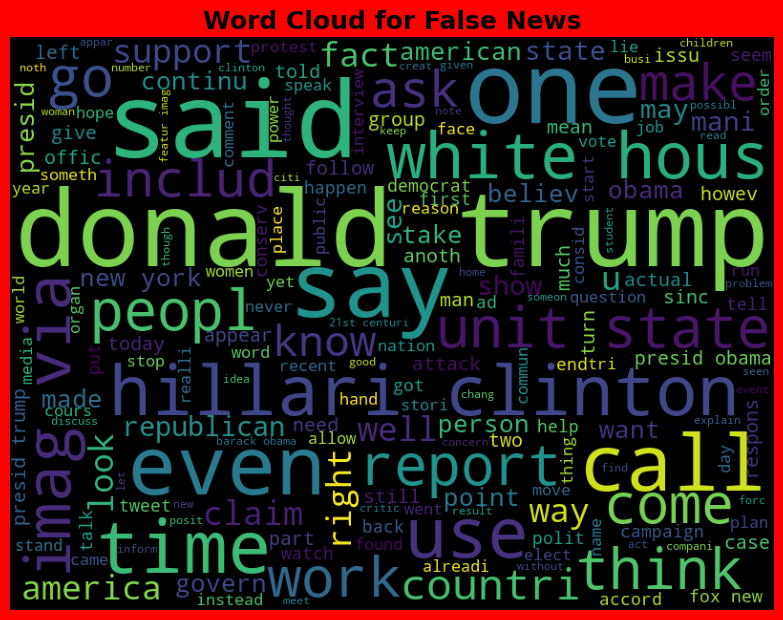

In [60]:
# Frequent uses of words
# importing word clouds
from wordcloud import WordCloud
# using features of wordclouds
wc=WordCloud(width=800,height=600,min_font_size=11,background_color='black')
# generating a cloud of words
spam_wordcloud=wc.generate(df[df['Class_Labels']==1]['Transformed_Text'].str.cat(sep=' '))

# ploting using plt
plt.figure(figsize=(8,7),facecolor='red')
plt.imshow(spam_wordcloud)
plt.title('Word Cloud for False News',fontsize=18,fontweight ='bold',)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

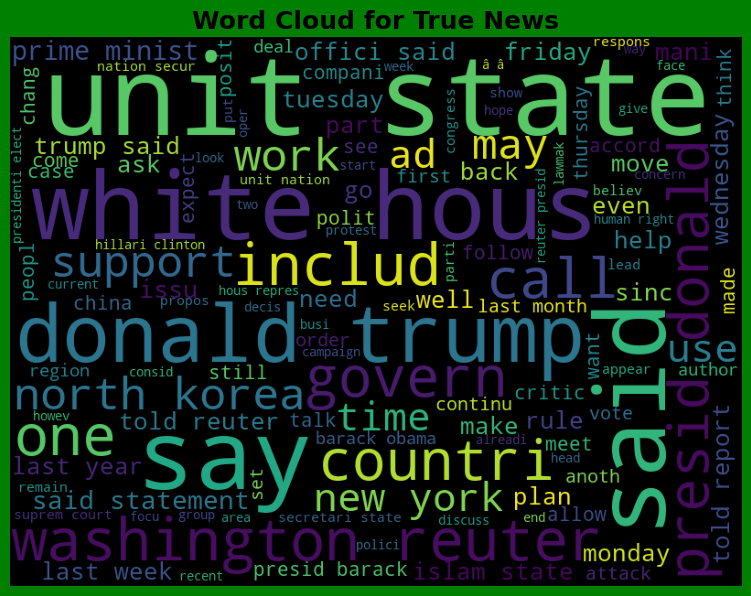

In [61]:
# using features of wordclouds
wc=WordCloud(width=800,height=600,min_font_size=11,background_color='black')
# generating a cloud of words
spam_wordcloud=wc.generate(df[df['Class_Labels']==0]['Transformed_Text'].str.cat(sep=' '))

# ploting using plt
plt.figure(figsize=(8,6),facecolor='green')
plt.imshow(spam_wordcloud)
plt.title('Word Cloud for True News',fontsize=18,fontweight ='bold',)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

# **MODEL BUILDING**

- Bag of Words(CountVectorizer)
- TF-IDF
- Word2vec

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(max_features=3000)
x=vec.fit_transform(df['Transformed_Text']).toarray()

In [63]:
print("The Shape of X :",x.shape)

The Shape of X : (44689, 3000)


In [64]:
y=df['Class_Labels']
print("The shape of y: ",y.shape)

The shape of y:  (44689,)


# **Importing Library:**

In [65]:
from sklearn.model_selection import train_test_split

# Metrics Used
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import precision_score

# Naive_Bayes Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

# Another Models
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# creating instances
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

# Another Models
lg=LogisticRegression()
rfc=RandomForestClassifier()
etc=ExtraTreesClassifier()
gbc=GradientBoostingClassifier()
sgd=SGDClassifier()
mlp=MLPClassifier()

models=[gnb,mnb,bnb,lg,rfc,etc,gbc,sgd,mlp] # different models

# Applying Train Test

In [67]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=4,test_size=0.20)

print("Shape x train ",x_train.shape," x test",x_test.shape)
print("shape y train ",y_train.shape," y_test",y_test.shape)

Shape x train  (35751, 3000)  x test (8938, 3000)
shape y train  (35751,)  y_test (8938,)


****************************** 
 GaussianNB() 
 ******************************
Training Score 0.9066599535677323 And Precision Score 90.22540095361941
Accuracy Training Score = 0.9066599535677323  Accuracy Test Score = 0.8993063325128664 

Training Confusion_Matrix 
 [[15193  1692]
 [ 1645 17221]] Testing Confusion_Matrix 
 [[3875  451]
 [ 449 4163]]
Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      4326
           1       0.90      0.90      0.90      4612

    accuracy                           0.90      8938
   macro avg       0.90      0.90      0.90      8938
weighted avg       0.90      0.90      0.90      8938

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.774599228227523 Training Score  0.9066599535677323 Testing Score  0.8993063325128664
A cross-fold  3 CV_mean  0.8319723228515482 Training Score  0.9066599535677323 Testing Score  0.8993063325128664
A cross-fold  4 CV_mean  0.850835538

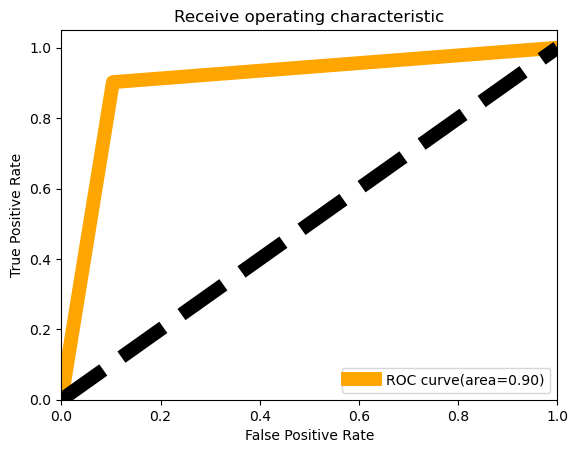

****************************** 
 MultinomialNB() 
 ******************************
Training Score 0.9249531481636877 And Precision Score 92.20252082888271
Accuracy Training Score = 0.9249531481636877  Accuracy Test Score = 0.9260460953233386 

Training Confusion_Matrix 
 [[15448  1437]
 [ 1246 17620]] Testing Confusion_Matrix 
 [[3961  365]
 [ 296 4316]]
Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      4326
           1       0.92      0.94      0.93      4612

    accuracy                           0.93      8938
   macro avg       0.93      0.93      0.93      8938
weighted avg       0.93      0.93      0.93      8938

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.7941121944650008 Training Score  0.9249531481636877 Testing Score  0.9260460953233386
A cross-fold  3 CV_mean  0.8701247401869493 Training Score  0.9249531481636877 Testing Score  0.9260460953233386
A cross-fold  4 CV_mean  0.88451

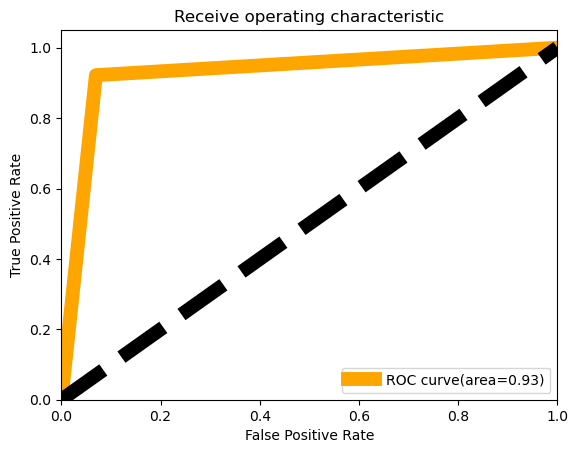

****************************** 
 BernoulliNB() 
 ******************************
Training Score 0.9613437386366815 And Precision Score 96.52928416485899
Accuracy Training Score = 0.9613437386366815  Accuracy Test Score = 0.9639740434101589 

Training Confusion_Matrix 
 [[16233   652]
 [  730 18136]] Testing Confusion_Matrix 
 [[4166  160]
 [ 162 4450]]
Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      4326
           1       0.97      0.96      0.97      4612

    accuracy                           0.96      8938
   macro avg       0.96      0.96      0.96      8938
weighted avg       0.96      0.96      0.96      8938

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.84475073119778 Training Score  0.9613437386366815 Testing Score  0.9639740434101589
A cross-fold  3 CV_mean  0.9133560683947904 Training Score  0.9613437386366815 Testing Score  0.9639740434101589
A cross-fold  4 CV_mean  0.931145671

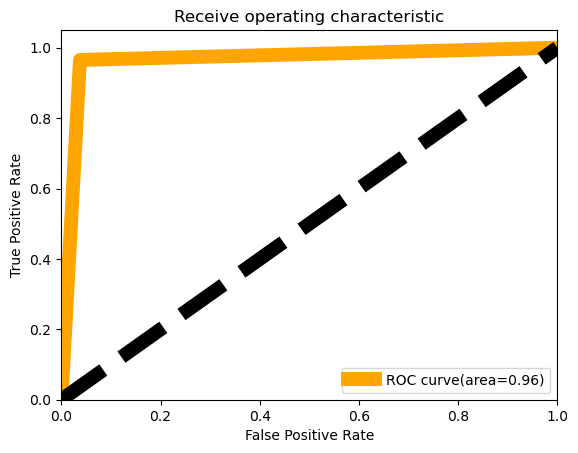

****************************** 
 LogisticRegression() 
 ******************************
Training Score 0.9894268691784845 And Precision Score 99.1480996068152
Accuracy Training Score = 0.9894268691784845  Accuracy Test Score = 0.98746923249049 

Training Confusion_Matrix 
 [[16712   173]
 [  205 18661]] Testing Confusion_Matrix 
 [[4287   39]
 [  73 4539]]
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4326
           1       0.99      0.98      0.99      4612

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.918951697283358 Training Score  0.9894268691784845 Testing Score  0.98746923249049
A cross-fold  3 CV_mean  0.9652486127381286 Training Score  0.9894268691784845 Testing Score  0.98746923249049
A cross-fold  4 CV_mean  0.96950011

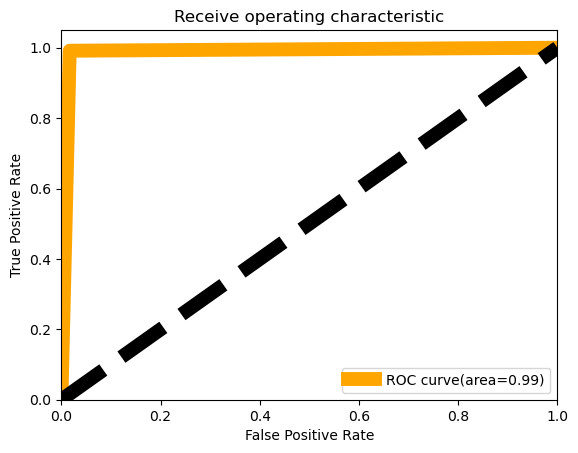

****************************** 
 RandomForestClassifier() 
 ******************************
Training Score 0.9999720287544405 And Precision Score 99.82646420824295
Accuracy Training Score = 0.9999720287544405  Accuracy Test Score = 0.9979861266502573 

Training Confusion_Matrix 
 [[16884     1]
 [    0 18866]] Testing Confusion_Matrix 
 [[4318    8]
 [  10 4602]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4326
           1       1.00      1.00      1.00      4612

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.976907337230331 Training Score  0.9999720287544405 Testing Score  0.9979861266502573
A cross-fold  3 CV_mean  0.994092456409294 Training Score  0.9999720287544405 Testing Score  0.9979861266502573
A cross-fold  4 CV_mean  

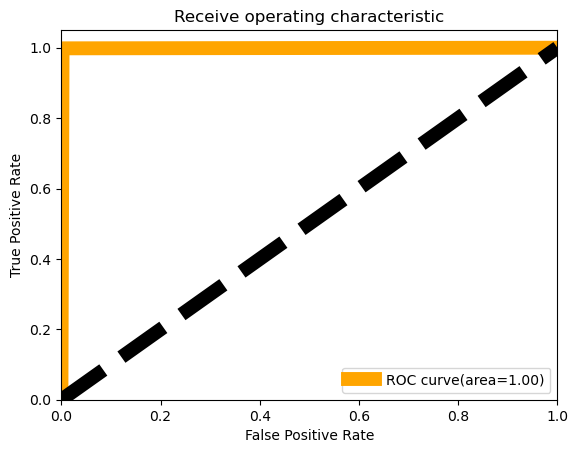

****************************** 
 ExtraTreesClassifier() 
 ******************************
Training Score 0.9999720287544405 And Precision Score 99.62857767096351
Accuracy Training Score = 0.9999720287544405  Accuracy Test Score = 0.9922801521593198 

Training Confusion_Matrix 
 [[16884     1]
 [    0 18866]] Testing Confusion_Matrix 
 [[4309   17]
 [  52 4560]]
Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4326
           1       1.00      0.99      0.99      4612

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.9420665912135131 Training Score  0.9999720287544405 Testing Score  0.9922801521593198
A cross-fold  3 CV_mean  0.9782941819902319 Training Score  0.9999720287544405 Testing Score  0.9922801521593198
A cross-fold  4 CV_mean  

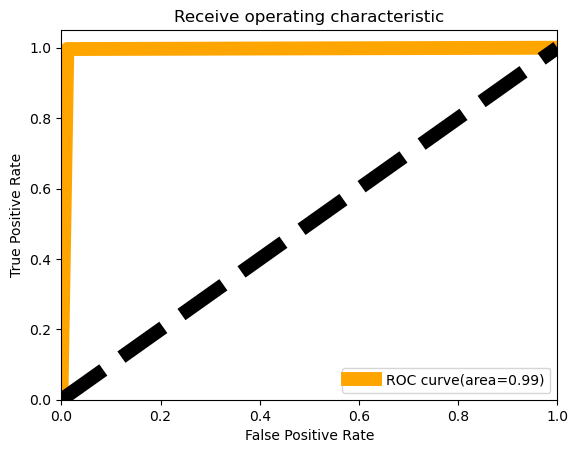

****************************** 
 GradientBoostingClassifier() 
 ******************************
Training Score 0.9968392492517691 And Precision Score 99.71671388101983
Accuracy Training Score = 0.9968392492517691  Accuracy Test Score = 0.9945177892145894 

Training Confusion_Matrix 
 [[16860    25]
 [   88 18778]] Testing Confusion_Matrix 
 [[4313   13]
 [  36 4576]]
Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4326
           1       1.00      0.99      0.99      4612

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.9915415176210514 Training Score  0.9968392492517691 Testing Score  0.9945177892145894
A cross-fold  3 CV_mean  0.9923694408250894 Training Score  0.9968392492517691 Testing Score  0.9945177892145894
A cross-fold  4 CV_

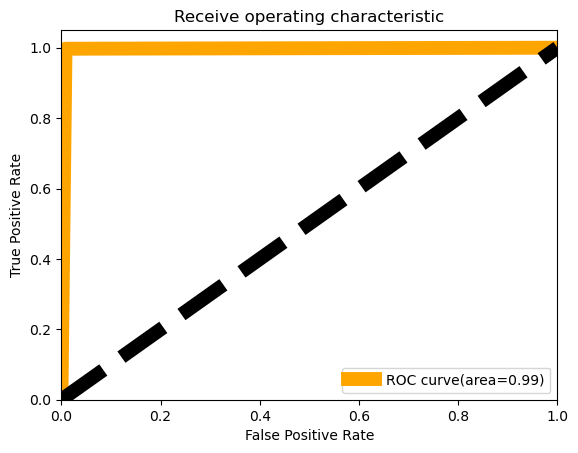

****************************** 
 SGDClassifier() 
 ******************************
Training Score 0.9905736902464267 And Precision Score 99.55956837700947
Accuracy Training Score = 0.9905736902464267  Accuracy Test Score = 0.9875811143432536 

Training Confusion_Matrix 
 [[16800    85]
 [  252 18614]] Testing Confusion_Matrix 
 [[4306   20]
 [  91 4521]]
Classification Report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4326
           1       1.00      0.98      0.99      4612

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.9409703303186522 Training Score  0.9905736902464267 Testing Score  0.9875811143432536
A cross-fold  3 CV_mean  0.9747812845845085 Training Score  0.9905736902464267 Testing Score  0.9875811143432536
A cross-fold  4 CV_mean  0.97601

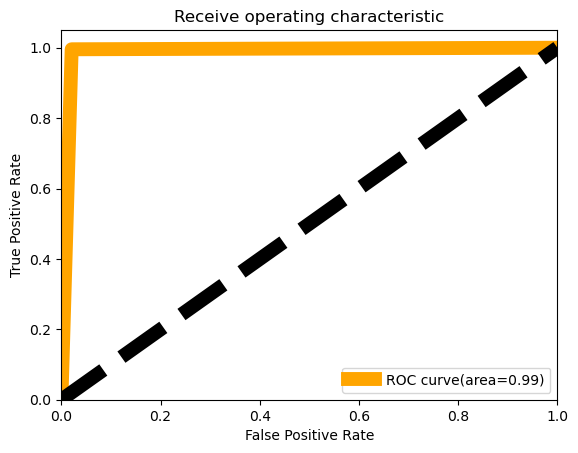

****************************** 
 MLPClassifier() 
 ******************************
Training Score 0.9999720287544405 And Precision Score 98.91681109185441
Accuracy Training Score = 0.9999720287544405  Accuracy Test Score = 0.9892593421347058 

Training Confusion_Matrix 
 [[16884     1]
 [    0 18866]] Testing Confusion_Matrix 
 [[4276   50]
 [  46 4566]]
Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4326
           1       0.99      0.99      0.99      4612

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.9196004047294979 Training Score  0.9999720287544405 Testing Score  0.9892593421347058
A cross-fold  3 CV_mean  0.9662559294552994 Training Score  0.9999720287544405 Testing Score  0.9892593421347058
A cross-fold  4 CV_mean  0.97137

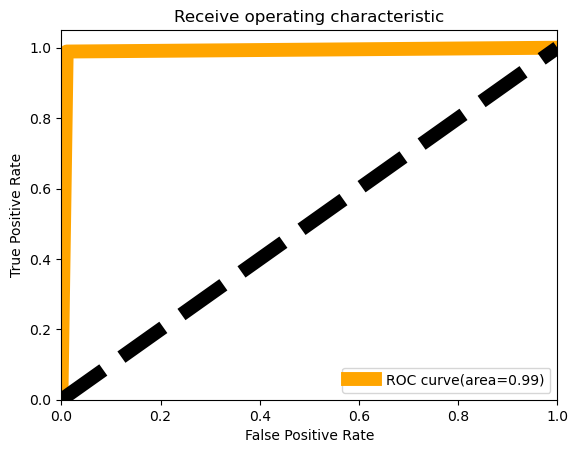

In [68]:
# running loop on list of models
for m in models:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    
    # printing result
    print("******"*5,"\n",m,"\n","******"*5)
    print("Training Score",score,"And Precision Score",precision_score(y_test, pred_test)*100)
    print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
    print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
    print("Classification Report \n",classification_report(y_test,pred_test))
    
    print(" *"*5,"\n MODEL CROSSVALIDATION")
    
    #train test Accuracy
    train_accuracy=accuracy_score(y_train,pred_train)
    test_accuracy =accuracy_score(y_test,pred_test)

    #Range finding cv Score
    for i in range(2,6):
        cv_score=cross_val_score(m,x,y,cv=i)
        cv_mean=cv_score.mean()
        print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)
    
    
    # Graph representing Auc_Roc_Graph
    from sklearn.metrics import roc_curve,auc
    fpr,tpr,thresholds= roc_curve(pred_test,y_test)
    roc_auc =auc(fpr,tpr)

    #ploting graph
    plt.figure(8,5)
    plt.plot(fpr,tpr,color='orange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='black',lw=10,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receive operating characteristic")
    plt.legend(loc="lower right")
    plt.show()

# Hyper-Parameter (Finding The best Model)



- Almost all the model working with highest score of approx 99 percent.
- Selected Two models for on the basis of precision which is True positives/ (True positives + False positives) and cv_score

- Model Training Score 0.9999720287544405 And Precision Score 99.82646420824295 (Ramdom Forest)
- Model Training Score 0.9968392492517691 And Precision Score 99.71671388101983 (Gradient Boosting)


## Model1 (Random-Forest)

In [72]:
# importing library
from sklearn.model_selection import GridSearchCV

#parameters used for search
param={"criterion":['gini', 'entropy', 'log_loss']}

#creating instance
gsv=GridSearchCV(rfc,param, cv=5)

# training model
gsv.fit(x_train,y_train)

#finding best parameters and Best Score
print("Best Params: ",gsv.best_params_,"\nBest_Score ",gsv.best_score_)

Best Params:  {'criterion': 'gini'} 
Best_Score  0.9967833223970828


In [86]:
# model called as per best parameters
rfc=RandomForestClassifier(n_estimators=100,criterion='gini',min_samples_split=4)

# score determined
rfc_score=rfc.fit(x_train,y_train)

# train and test score
pred_test=rfc.predict(x_test)
pred_train=rfc.predict(x_train)

# Model score 
print("Training Score",rfc_score,"And Precision Score",precision_score(y_test, pred_test)*100)
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Training Score RandomForestClassifier(min_samples_split=4) And Precision Score 99.80494148244473
Accuracy Training Score = 0.9999720287544405  Accuracy Test Score = 0.9982098903557843 

Training Confusion_Matrix 
 [[16884     1]
 [    0 18866]] Testing Confusion_Matrix 
 [[4317    9]
 [   7 4605]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4326
           1       1.00      1.00      1.00      4612

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

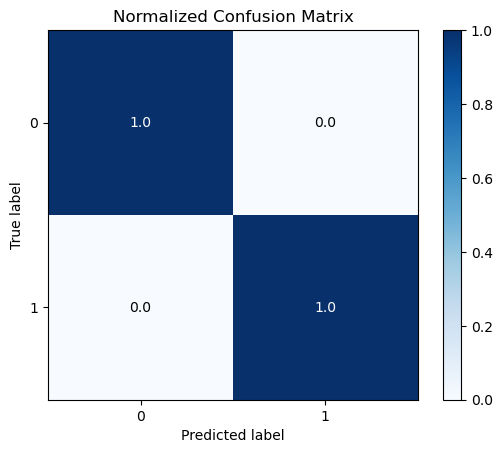

In [88]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred_test, normalize=True)

In [89]:
#train test Accuracy
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy =accuracy_score(y_test,pred_test)

#Range finding cv Score
for i in range(2,6):
    cv_score=cross_val_score(rfc,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.9745578523715548 Training Score  0.9999720287544405 Testing Score  0.9982098903557843
A cross-fold  3 CV_mean  0.993734415452992 Training Score  0.9999720287544405 Testing Score  0.9982098903557843
A cross-fold  4 CV_mean  0.9943609463174116 Training Score  0.9999720287544405 Testing Score  0.9982098903557843
A cross-fold  5 CV_mean  0.9961063938457044 Training Score  0.9999720287544405 Testing Score  0.9982098903557843


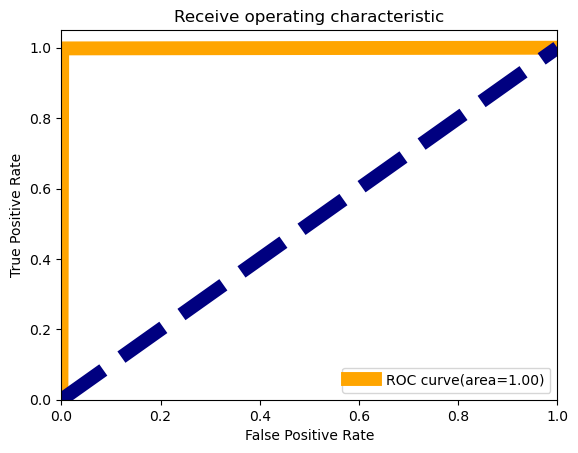

In [90]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc =auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Trial Method (Logistic Regression)

In [92]:
from sklearn.model_selection import GridSearchCV
grid_params={'penalty':['l1', 'l2', 'elasticnet'],
           'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
           'C':(0.001, 0.01, 0.1, 1, 10)}

gsv=GridSearchCV(lg,grid_params, cv=5)
gsv.fit(x_train,y_train)

print("Best Params: ",gsv.best_params_,"\nBest_Score ",gsv.best_score_)

Best Params:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'} 
Best_Score  0.9937344456690003


In [105]:
lg=LogisticRegression(penalty= 'l1', solver= 'liblinear')
lg_score=lg.fit(x_train,y_train)
pred_train1=lg.predict(x_train)
pred_test1=lg.predict(x_test)


print("Training Score",lg_score,"And Precision Score",precision_score(y_test, pred_test1)*100)
print("Accuracy Training Score =",accuracy_score(y_train,pred_train1)," Accuracy Test Score =",accuracy_score(y_test,pred_test1),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train1),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test1))
print("Classification Report \n",classification_report(y_test,pred_test1))

Training Score LogisticRegression(penalty='l1', solver='liblinear') And Precision Score 99.54357748315583
Accuracy Training Score = 0.9945176358703253  Accuracy Test Score = 0.9940702618035354 

Training Confusion_Matrix 
 [[16823    62]
 [  134 18732]] Testing Confusion_Matrix 
 [[4305   21]
 [  32 4580]]
Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4326
           1       1.00      0.99      0.99      4612

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



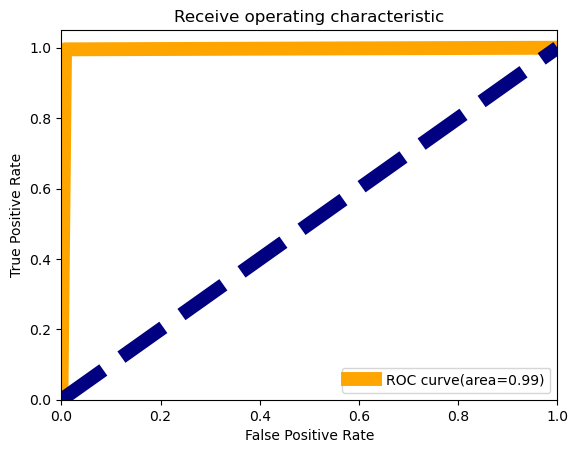

In [106]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,thresholds= roc_curve(pred_test1,y_test)
roc_auc =auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Saving Model

In [109]:
# loading pickle

import pickle
filename='fakenews_classification.pkl'
pickle.dump(rfc,open(filename,"wb"))

In [110]:
# loading pack file
pickled_model= pickle.load(open(filename,'rb'))
result=pickled_model.score(x_test,y_test)
print("Score Obtained",result*100)

Score Obtained 99.82098903557844


In [111]:
pd.set_option("display.max_columns",None)# max rows display
pd.set_option("display.max_rows",None) # max columns display

In [112]:
array=np.array(y_test)

conclude=pd.DataFrame([pickled_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclude

0     1     2     3     4     5     6     7     8     9     10    \
Predicted     1     0     1     1     0     1     0     1     1     1     1   
Original      1     0     1     1     0     1     0     1     1     1     1   

           11    12    13    14    15    16    17    18    19    20    21    \
Predicted     0     1     0     1     0     0     1     0     0     0     1   
Original      0     1     0     1     0     0     1     0     0     0     1   

           22    23    24    25    26    27    28    29    30    31    32    \
Predicted     1     1     1     1     0     0     1     0     0     0     1   
Original      1     1     1     1     0     0     1     0     0     0     1   

           33    34    35    36    37    38    39    40    41    42    43    \
Predicted     0     0     0     0     1     1     0     0     1     1     0   
Original      0     0     0     0     1     1     0     0     1     1     0   

           44    45    46    47    48    49    50    51    52    53    54    \
Predicted     0     1     0     1     0     1     0     0     0     0     0   
Original      0     1     0     1     0     1     0     0     0     0     0   

           55    56    57    58    59    60    61    62    63    64    65    \
Predicted     1     0     0     1     0     0     1     0     1     0     0   
Original      1     0     0     1     0     0     1     0     1     0     0   

           66    67    68    69    70    71    72    73    74    75    76    \
Predicted     1     1     0     1     0     1     0     0     1     0     0   
Original      1     1     0     1     0     1     0     0     1     0     0   

           77    78    79    80    81    82    83    84    85    86    87    \
Predicted     1     1     1     1     0     0     0     0     0     1     1   
Original      1     1     1     1     0     0     0     0     0     1     1   

           88    89    90    91    92    93    94    95    96    97    98    \
Predicted     1     0     0     1     0     0     0     1     0     0     1   
Original      1     0     0     1     0     0     0     1     0     0     1   

           99    100   101   102   103   104   105   106   107   108   109   \
Predicted     1     0     1     1     1     0     1     0     1     1     0   
Original      1     0     1     1     1     0     1     0     1     1     0   

           110   111   112   113   114   115   116   117   118   119   120   \
Predicted     0     1     1     0     0     1     0     0     1     0     1   
Original      0     1     1     0     0     1     0     0     1     0     1   

           121   122   123   124   125   126   127   128   129   130   131   \
Predicted     0     0     1     0     0     1     1     1     0     0     1   
Original      0     0     1     0     0     1     1     1     0     0     1   

           132   133   134   135   136   137   138   139   140   141   142   \
Predicted     1     1     0     1     1     0     0     0     1     1     0   
Original      1     1     0     1     1     0     0     0     1     1     0   

           143   144   145   146   147   148   149   150   151   152   153   \
Predicted     0     0     0     0     1     1     1     0     1     1     0   
Original      0     0     0     0     1     1     1     0     1     1     0   

           154   155   156   157   158   159   160   161   162   163   164   \
Predicted     1     1     0     1     0     1     0     1     0     1     1   
Original      1     1     0     1     0     1     0     1     0     1     1   

           165   166   167   168   169   170   171   172   173   174   175   \
Predicted     1     1     1     1     0     1     1     1     0     1     1   
Original      1     1     1     1     0     1     1     1     0     1     1   

           176   177   178   179   180   181   182   183   184   185   186   \
Predicted     1     1     1     1     0     1     1     0     1     1     1   
Original      1     1     1     1     0     1